In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nishadchaoji","key":"822bfa9b84c61ddf1d4929ddd5479460"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 76% 50.0M/66.0M [00:00<00:00, 160MB/s]
100% 66.0M/66.0M [00:00<00:00, 165MB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd 
DF = pd.read_csv("creditcard.csv")

In [ ]:
# Splitting the dataframe into X and Y
X = DF.iloc[:, DF.columns != 'Class']
y = DF.iloc[:, DF.columns == 'Class']

In [ ]:
# Working with imbalanced data
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split
# Scale all numerical features in X  using sklearn's StandardScaler class
scale = ss()
X_trans = scale.fit_transform(X)
X_trans.shape
#Balancing the Data using ADASYN 
ad = ADASYN()
X_res1, y_res1 = ad.fit_resample(X_trans, y)





In [ ]:
X_train, X_test, y_train, y_test =   train_test_split(X_res1,
                                                      y_res1,
                                                      train_size = 0.6,
                                                      stratify = y_res1
                                                      )
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size = 0.3,stratify = y_test)



In [ ]:
print("Training data : ",y_train.shape)
print("Testing data : ",y_test.shape)
print('Validation data : ',y_val.shape)

Training data :  (341176, 1)
Testing data :  (159216, 1)
Validation data :  (68236, 1)


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import numpy as np


In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

NAIVE BAYES MULTINOMIAL

In [ ]:
X_minmax = MinMaxScaler().fit(X_train)
X_minmax1 = MinMaxScaler().fit(X_test)
X_minmax2 = MinMaxScaler().fit(X_val)


X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax1.transform(X_test)
X_val_scaled = X_minmax2.transform(X_val)


multinomialModel = MultinomialNB()
multinomialModel
multinomialModel.fit(X_train_scaled, y_train.values.ravel())

MultinomialNB()

                precision    recall  f1-score   support

Non Fraudulent       0.58      1.00      0.74     79608
    Fraudulent       0.99      0.29      0.45     79608

      accuracy                           0.64    159216
     macro avg       0.79      0.64      0.59    159216
  weighted avg       0.79      0.64      0.59    159216

 Naive Bayes
Accuracy:  0.6430886343081097
Precision:  0.9875866792226693
Recall:  0.2898201185810471
F1-Score:  0.448130523453433
AUC score:  0.6430886343081097




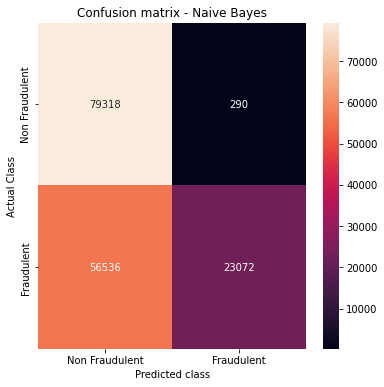

NameError: ignored

In [ ]:
# Make predictions
multinomialPredictions = multinomialModel.predict(X_test_scaled)
MBScore = multinomialModel.predict_proba(X_test_scaled)[:,1]
multinomialPredictions1 = multinomialModel.predict(X_val_scaled)

# Print classification report
print(classification_report(y_test, multinomialPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))


print(" Naive Bayes")
print("======================")
print("Accuracy: ",accuracy_score(y_test,multinomialPredictions)) 
print("Precision: ",precision_score(y_test,multinomialPredictions))
print("Recall: ",recall_score(y_test,multinomialPredictions))
print("F1-Score: ",f1_score(y_test,multinomialPredictions))
print("AUC score: ",roc_auc_score(y_test,multinomialPredictions))




confusionMatrix = confusion_matrix(y_test,multinomialPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Naive Bayes") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
print("\n")
plt.show()
p, r, t = precision_recall_curve(y_test,MBScore)
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % roc_auc_score(y_test,MBScore))


In [ ]:
multinomialModel.get_params().keys()

In [ ]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust

multinomialParamGrid = {'alpha': [0, 1, 2, 3],
                        'fit_prior': ['false','true']}
multinomialGrid = GridSearchCV(multinomialModel, multinomialParamGrid, verbose=3)

In [ ]:
multinomialGrid.fit(X_val_scaled, y_val)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..........alpha=0, fit_prior=false;, score=0.796 total time=   0.0s
[CV 2/5] END ..........alpha=0, fit_prior=false;, score=0.791 total time=   0.1s
[CV 3/5] END ..........alpha=0, fit_prior=false;, score=0.788 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 4/5] END ..........alpha=0, fit_prior=false;, score=0.799 total time=   0.1s
[CV 5/5] END ..........alpha=0, fit_prior=false;, score=0.791 total time=   0.1s
[CV 1/5] END ...........alpha=0, fit_prior=true;, score=0.796 total time=   0.1s
[CV 2/5] END ...........alpha=0, fit_prior=true;, score=0.791 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 3/5] END ...........alpha=0, fit_prior=true;, score=0.788 total time=   0.1s
[CV 4/5] END ...........alpha=0, fit_prior=true;, score=0.799 total time=   0.1s
[CV 5/5] END ...........alpha=0, fit_prior=true;, score=0.791 total time=   0.0s
[CV 1/5] END ..........alpha=1, fit_prior=false;, score=0.796 total time=   0.0s
[CV 2/5] END ..........alpha=1, fit_prior=false;, score=0.790 total time=   0.0s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


[CV 3/5] END ..........alpha=1, fit_prior=false;, score=0.788 total time=   0.1s
[CV 4/5] END ..........alpha=1, fit_prior=false;, score=0.799 total time=   0.1s
[CV 5/5] END ..........alpha=1, fit_prior=false;, score=0.791 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END ...........alpha=1, fit_prior=true;, score=0.796 total time=   0.1s
[CV 2/5] END ...........alpha=1, fit_prior=true;, score=0.790 total time=   0.1s
[CV 3/5] END ...........alpha=1, fit_prior=true;, score=0.788 total time=   0.0s
[CV 4/5] END ...........alpha=1, fit_prior=true;, score=0.799 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END ...........alpha=1, fit_prior=true;, score=0.791 total time=   0.0s
[CV 1/5] END ..........alpha=2, fit_prior=false;, score=0.796 total time=   0.1s
[CV 2/5] END ..........alpha=2, fit_prior=false;, score=0.790 total time=   0.0s
[CV 3/5] END ..........alpha=2, fit_prior=false;, score=0.788 total time=   0.0s
[CV 4/5] END ..........alpha=2, fit_prior=false;, score=0.799 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END ..........alpha=2, fit_prior=false;, score=0.791 total time=   0.1s
[CV 1/5] END ...........alpha=2, fit_prior=true;, score=0.796 total time=   0.0s
[CV 2/5] END ...........alpha=2, fit_prior=true;, score=0.790 total time=   0.1s
[CV 3/5] END ...........alpha=2, fit_prior=true;, score=0.788 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ...........alpha=2, fit_prior=true;, score=0.799 total time=   0.1s
[CV 5/5] END ...........alpha=2, fit_prior=true;, score=0.791 total time=   0.1s
[CV 1/5] END ..........alpha=3, fit_prior=false;, score=0.796 total time=   0.1s
[CV 2/5] END ..........alpha=3, fit_prior=false;, score=0.790 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END ..........alpha=3, fit_prior=false;, score=0.788 total time=   0.1s
[CV 4/5] END ..........alpha=3, fit_prior=false;, score=0.799 total time=   0.1s
[CV 5/5] END ..........alpha=3, fit_prior=false;, score=0.791 total time=   0.1s
[CV 1/5] END ...........alpha=3, fit_prior=true;, score=0.796 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END ...........alpha=3, fit_prior=true;, score=0.790 total time=   0.1s
[CV 3/5] END ...........alpha=3, fit_prior=true;, score=0.788 total time=   0.1s
[CV 4/5] END ...........alpha=3, fit_prior=true;, score=0.799 total time=   0.1s
[CV 5/5] END ...........alpha=3, fit_prior=true;, score=0.791 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0, 1, 2, 3], 'fit_prior': ['false', 'true']},
             verbose=3)

                precision    recall  f1-score   support

Non Fraudulent       0.79      0.75      0.77     79608
    Fraudulent       0.76      0.80      0.78     79608

      accuracy                           0.77    159216
     macro avg       0.78      0.77      0.77    159216
  weighted avg       0.78      0.77      0.77    159216

 Naive Bayes
Accuracy:  0.7745515526077781
Precision:  0.7628594450925447
Recall:  0.7967917797206311
F1-Score:  0.7794564903506455
AUC score:  0.7745515526077781




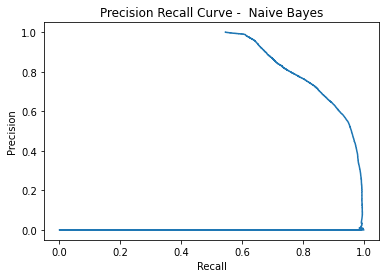

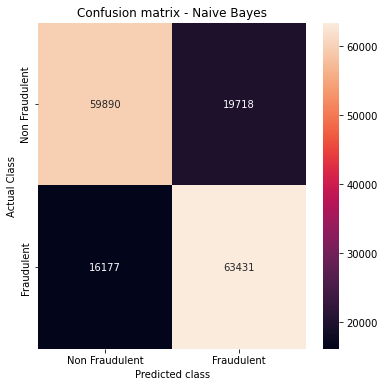

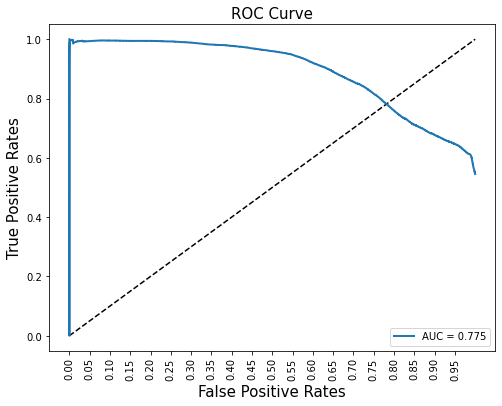

In [ ]:
# Make predictions with the hyperparameter tuned model
multinomialGridPredictions = multinomialGrid.predict(X_test_scaled)
multinomialGridscore = multinomialGrid.predict_proba(X_test_scaled)[:,1]
# Print classification report
print(classification_report(y_test, multinomialGridPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print(" Naive Bayes")
print("======================")
print("Accuracy: ",accuracy_score(y_test,multinomialGridPredictions)) 
print("Precision: ",precision_score(y_test,multinomialGridPredictions))
print("Recall: ",recall_score(y_test,multinomialGridPredictions))
print("F1-Score: ",f1_score(y_test,multinomialGridPredictions))
print("AUC score: ",roc_auc_score(y_test,multinomialGridPredictions))
multinomialGridPredictionss1 = multinomialGrid.predict(X_val_scaled)


p, r, t = precision_recall_curve(y_test,multinomialGridscore)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve -  Naive Bayes')


confusionMatrix = confusion_matrix(y_test,multinomialGridPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Naive Bayes") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
print("\n")
plt.show()

print("\n")

plot_roc_curve(fpr=r, tpr=p, label="AUC = %.3f" % roc_auc_score(y_test,multinomialGridPredictions))


In [ ]:
print(multinomialGrid.best_params_)
print(multinomialGrid.best_score_)

{'alpha': 0, 'fit_prior': 'false'}
0.793041752560006


In [ ]:
# Create hyperparameter tuned model with the suggested best params
hypertunedMultinomialModel = MultinomialNB(alpha=0, fit_prior=False)
hypertunedMultinomialModel
hypertunedMultinomialModel.fit(X_train_scaled, y_train)
hypertunedMultinomialModelPredictions = hypertunedMultinomialModel.predict(X_test_scaled)
hypertunedMultinomialModelPredictProba = hypertunedMultinomialModel.predict_proba(X_test_scaled)[:,1]
# Print classification report
print(classification_report(y_test, hypertunedMultinomialModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


                precision    recall  f1-score   support

Non Fraudulent       0.71      0.93      0.81     79608
    Fraudulent       0.90      0.62      0.74     79608

      accuracy                           0.78    159216
     macro avg       0.81      0.78      0.77    159216
  weighted avg       0.81      0.78      0.77    159216



 Naive Bayes
Accuracy:  0.7772334438749874
Precision:  0.9039017605504923
Recall:  0.6204275952165611
F1-Score:  0.7358063314711359
AUC score:  0.7772334438749875




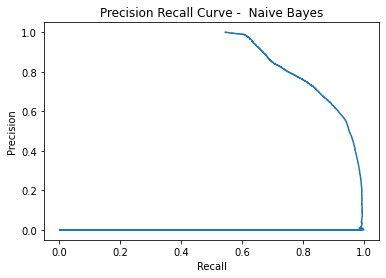

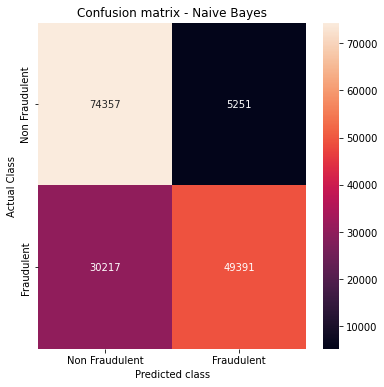

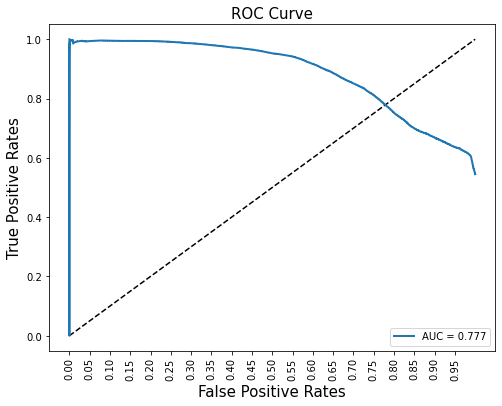

In [ ]:
print(" Naive Bayes")
print("======================")
print("Accuracy: ",accuracy_score(y_test,hypertunedMultinomialModelPredictions)) 
print("Precision: ",precision_score(y_test,hypertunedMultinomialModelPredictions))
print("Recall: ",recall_score(y_test,hypertunedMultinomialModelPredictions))
print("F1-Score: ",f1_score(y_test,hypertunedMultinomialModelPredictions))
print("AUC score: ",roc_auc_score(y_test,hypertunedMultinomialModelPredictions))
hypertunedMultinomialModelPredictions1 = hypertunedMultinomialModel.predict(X_val_scaled)


p, r, t = precision_recall_curve(y_test,hypertunedMultinomialModelPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve -  Naive Bayes')


confusionMatrix = confusion_matrix(y_test,hypertunedMultinomialModelPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Naive Bayes") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
print("\n")
plt.show()

print("\n")

plot_roc_curve(fpr=r, tpr=p, label="AUC = %.3f" % roc_auc_score(y_test,hypertunedMultinomialModelPredictions))

# CAT Boost

In [ ]:
%%time
!pip install catboost
import catboost
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(loss_function= 'Logloss',eval_metric = 'AUC:hints=skip_train~false')
cat_untuned = cbc.fit(X_train_scaled, y_train)




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 99 kB/s 
Learning rate set to 0.124313
0:	learn: 0.9398151	total: 199ms	remaining: 3m 18s
1:	learn: 0.9626078	total: 325ms	remaining: 2m 42s
2:	learn: 0.9706251	total: 460ms	remaining: 2m 32s
3:	learn: 0.9727479	total: 596ms	remaining: 2m 28s
4:	learn: 0.9782017	total: 757ms	remaining: 2m 30s
5:	learn: 0.9797651	total: 889ms	remaining: 2m 27s
6:	learn: 0.9809427	total: 1.02s	remaining: 2m 24s
7:	learn: 0.9829010	total: 1.16s	remaining: 2m 24s
8:	learn: 0.9848426	total: 1.29s	remaining: 2m 22s
9:	learn: 0.9861134	total: 1.42s	remaining: 2m 20s
10:	learn: 0.9872002	total: 1.55s	remaining: 2m 19s
11:	learn: 0.9883226	total: 1.68s	remaining: 2m 17s
12:	learn: 0.9894812	total: 1.8s	remaining: 2m 17s
13:	learn: 0.9900760	total: 1.93s	remaining: 2m 15s
14:	learn: 0.9907500	total: 2.06s	remaining: 2m 15s
15:	learn: 0.9915511	total: 2.19s	remaining: 

 CATBOOST
Accuracy:  0.5662433423776505
Precision:  0.9991481306199717
Recall:  0.13259973871972666
F1-Score:  0.23412773224801217
AUC score:  0.5662433423776504
                precision    recall  f1-score   support

Non Fraudulent       0.54      1.00      0.70     79608
    Fraudulent       1.00      0.13      0.23     79608

      accuracy                           0.57    159216
     macro avg       0.77      0.57      0.47    159216
  weighted avg       0.77      0.57      0.47    159216





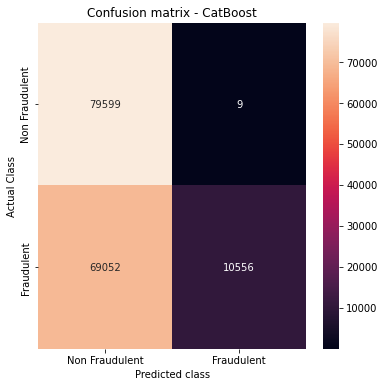

In [ ]:
cbc_pred = cbc.predict(X_test_scaled)
cbc_pred1 = cbc.predict(X_val_scaled)
print(" CATBOOST")
print("======================")
print("Accuracy: ",accuracy_score(y_test,cbc_pred)) 
print("Precision: ",precision_score(y_test,cbc_pred))
print("Recall: ",recall_score(y_test,cbc_pred))
print("F1-Score: ",f1_score(y_test,cbc_pred))
print("AUC score: ",roc_auc_score(y_test,cbc_pred))
print(classification_report(y_test,cbc_pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))

confusionMatrix = confusion_matrix(y_test,cbc_pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - CatBoost") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
print("\n")
plt.show()




In [ ]:
#Hyper tuning CatBoost
%%time
cbc_tuned = CatBoostClassifier(depth = 5,
                               iterations = 200,
                               learning_rate = 0.1,
                               l2_leaf_reg = 0.1,
                               loss_function= 'Logloss',
                               eval_metric = 'AUC:hints=skip_train~false')
cbc_tuned.fit(X_test_scaled, y_test.values.ravel())

0:	learn: 0.9306456	total: 154ms	remaining: 30.7s
1:	learn: 0.9508314	total: 286ms	remaining: 28.3s
2:	learn: 0.9599959	total: 406ms	remaining: 26.7s
3:	learn: 0.9631146	total: 496ms	remaining: 24.3s
4:	learn: 0.9650340	total: 625ms	remaining: 24.4s
5:	learn: 0.9679080	total: 760ms	remaining: 24.6s
6:	learn: 0.9709081	total: 900ms	remaining: 24.8s
7:	learn: 0.9724148	total: 977ms	remaining: 23.5s
8:	learn: 0.9748055	total: 1.11s	remaining: 23.5s
9:	learn: 0.9771230	total: 1.21s	remaining: 23s
10:	learn: 0.9776359	total: 1.32s	remaining: 22.6s
11:	learn: 0.9789944	total: 1.45s	remaining: 22.8s
12:	learn: 0.9801519	total: 1.59s	remaining: 22.8s
13:	learn: 0.9811172	total: 1.71s	remaining: 22.7s
14:	learn: 0.9826258	total: 1.85s	remaining: 22.8s
15:	learn: 0.9834139	total: 1.93s	remaining: 22.2s
16:	learn: 0.9843615	total: 2.07s	remaining: 22.3s
17:	learn: 0.9851935	total: 2.17s	remaining: 21.9s
18:	learn: 0.9860197	total: 2.28s	remaining: 21.7s
19:	learn: 0.9869584	total: 2.36s	remaining

 CATBOOST
Accuracy:  0.9979085016581248
Precision:  0.9958344278905693
Recall:  1.0
F1-Score:  0.9979128668935562
AUC score:  0.9979085016581248
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     79608
    Fraudulent       1.00      1.00      1.00     79608

      accuracy                           1.00    159216
     macro avg       1.00      1.00      1.00    159216
  weighted avg       1.00      1.00      1.00    159216





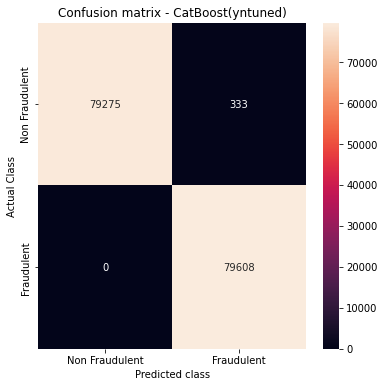

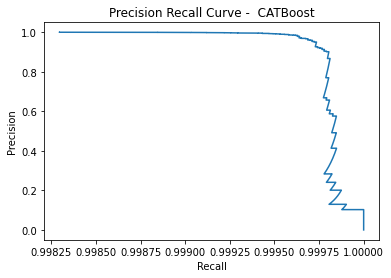

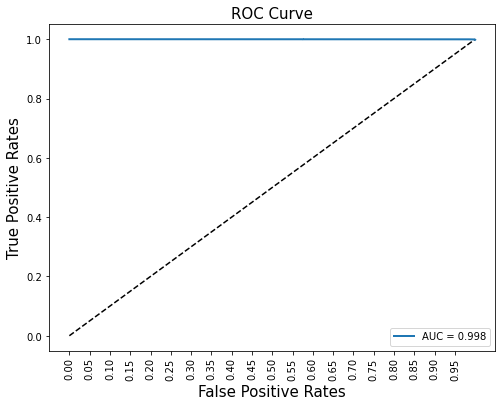

In [ ]:
cbc_tuned_pred = cbc_tuned.predict(X_test_scaled)
cbc_tuned_pred_proba = cbc_tuned.predict_proba(X_test_scaled)[:,1]
print(" CATBOOST")
print("======================")
print("Accuracy: ",accuracy_score(y_test,cbc_tuned_pred)) 
print("Precision: ",precision_score(y_test,cbc_tuned_pred))
print("Recall: ",recall_score(y_test,cbc_tuned_pred))
print("F1-Score: ",f1_score(y_test,cbc_tuned_pred))
print("AUC score: ",roc_auc_score(y_test,cbc_tuned_pred))
print(classification_report(y_test,cbc_tuned_pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))
cbc_tuned_pred1 = cbc_tuned.predict(X_val_scaled)

confusionMatrix = confusion_matrix(y_test,cbc_tuned_pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - CatBoost(tuned)") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
print("\n")
plt.show()
print("\n")

p, r, t = precision_recall_curve(y_test,cbc_tuned_pred_proba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve -  CATBoost')

print("\n")

plot_roc_curve(fpr=r, tpr=p, label="AUC = %.3f" % roc_auc_score(y_test,cbc_tuned_pred))


# LIGHTGBM

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

import lightgbm as lgbm
lgbm_clf = lgbm.LGBMClassifier(n_estimators=100, random_state = 42)


lgbm_clf.fit(X_train_scaled, y_train.values.ravel())
LGBM_pred = lgbm_clf.predict(X_test_scaled)
LGBM_score = lgbm_clf.predict_proba(X_test_scaled)[:,1]

CPU times: user 18.6 s, sys: 139 ms, total: 18.7 s
Wall time: 9.71 s


LIGHT GBM
Accuracy:  0.6901504873882022
Precision:  0.9827162855958417
Recall:  0.3871093357451512
F1-Score:  0.5554263880252688
AUC score:  0.6901504873882022
                precision    recall  f1-score   support

Non Fraudulent       0.62      0.99      0.76     79608
    Fraudulent       0.98      0.39      0.56     79608

      accuracy                           0.69    159216
     macro avg       0.80      0.69      0.66    159216
  weighted avg       0.80      0.69      0.66    159216





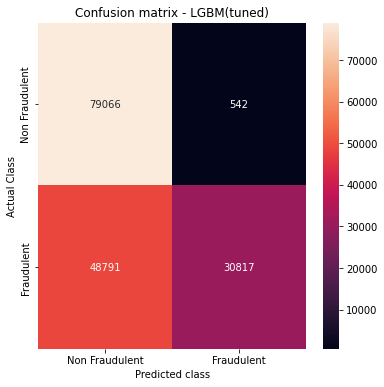

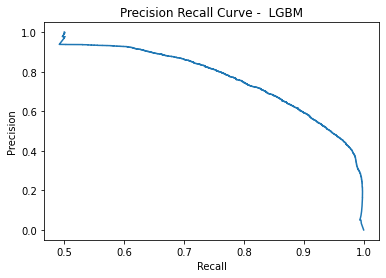

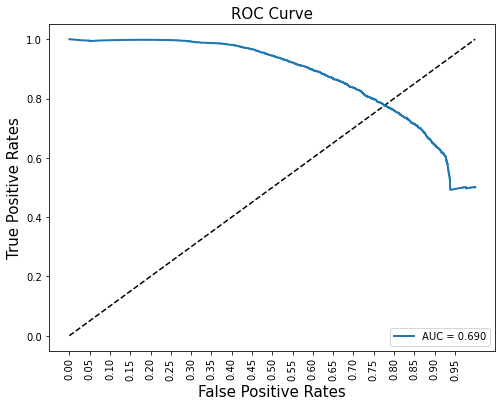

In [ ]:
print("LIGHT GBM")
print("======================")
print("Accuracy: ",accuracy_score(y_test,LGBM_pred)) 
print("Precision: ",precision_score(y_test,LGBM_pred))
print("Recall: ",recall_score(y_test,LGBM_pred))
print("F1-Score: ",f1_score(y_test,LGBM_pred))
print("AUC score: ",roc_auc_score(y_test,LGBM_pred))
print(classification_report(y_test,LGBM_pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))

confusionMatrix = confusion_matrix(y_test,LGBM_pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - LGBM(tuned)") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
print("\n")
plt.show()

p, r, t = precision_recall_curve(y_test,LGBM_score)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve -  LGBM')

print("\n")

plot_roc_curve(fpr=r, tpr=p, label="AUC = %.3f" % roc_auc_score(y_test,LGBM_pred))

In [ ]:

%%time
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 20.5 µs


In [ ]:
fit_params = {"early_stopping_rounds" : 50, 
             "eval_metric" : 'binary', 
             "eval_set" : [(X_test,y_test)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000, 3000, 5000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}


In [ ]:
#number of combinations
n_iter = 2 #(replace 2 by 200, 90 minutes)

#intialize lgbm and lunch the search
lgbm_clf = lgbm.LGBMClassifier(random_state=42, silent=True, metric='None', n_jobs=4)
Random_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=42,
    verbose=True)

Random_search.fit(X_test_scaled, y_test.values.ravel(), **fit_params)
print('Best score reached: {} with params: {} '.format(Random_search.best_score_, Random_search.best_params_))

opt_parameters =  Random_search.best_params_
clf_sw = lgbm.LGBMClassifier(**lgbm_clf.get_params())
#Optimal parameter
clf_sw.set_params(**opt_parameters)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best score reached: 0.9423299094027706 with params: {'colsample_bytree': 0.6247240713084175, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_samples': 120, 'min_child_weight': 100.0, 'n_estimators': 2000, 'num_leaves': 24, 'reg_alpha': 10, 'reg_lambda': 1, 'subsample': 0.5673991135726937} 


LGBMClassifier(colsample_bytree=0.6247240713084175, learning_rate=0.2,
               max_depth=4, metric='None', min_child_samples=120,
               min_child_weight=100.0, n_estimators=2000, n_jobs=4,
               num_leaves=24, random_state=42, reg_alpha=10, reg_lambda=1,
               subsample=0.5673991135726937)

In [ ]:
%%time
lgbm_clf_tuned = lgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.5112837457460335, importance_type='split',
        learning_rate=0.02, max_depth=7, metric='None',
        min_child_samples=195, min_child_weight=0.01, min_split_gain=0.0,
        n_estimators=3000, n_jobs=4, num_leaves=44, objective=None,
        random_state=42, reg_alpha=2, reg_lambda=10, silent=True,
        subsample=0.8137506311449016, subsample_for_bin=200000,
        subsample_freq=0)

lgbm_clf_tuned.fit(X_train_scaled, y_train.values.ravel())

lgbm_tuned_pred = lgbm_clf_tuned.predict(X_test_scaled)
lgbm_tuned_score = lgbm_clf_tuned.predict_proba(X_test_scaled)[:,1]

CPU times: user 6min 37s, sys: 10.8 s, total: 6min 48s
Wall time: 3min 40s


LIGHT GBM (UnTuned)
Accuracy:  0.6464990955682846
Precision:  0.9989304812834224
Recall:  0.2933122299266405
F1-Score:  0.4534729032947185
AUC score:  0.6464990955682847
                precision    recall  f1-score   support

Non Fraudulent       0.59      1.00      0.74     79608
    Fraudulent       1.00      0.29      0.45     79608

      accuracy                           0.65    159216
     macro avg       0.79      0.65      0.60    159216
  weighted avg       0.79      0.65      0.60    159216





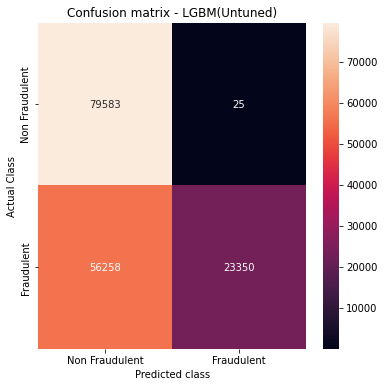

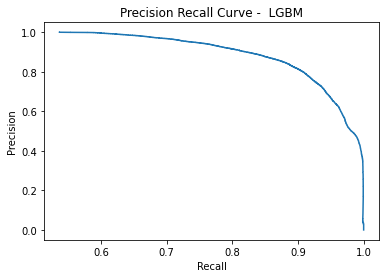

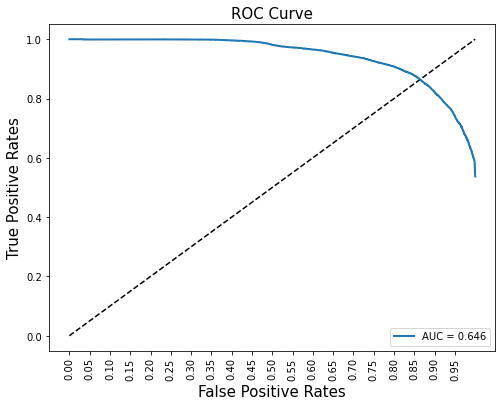

In [ ]:
print("LIGHT GBM (UnTuned)")
print("======================")
print("Accuracy: ",accuracy_score(y_test,lgbm_tuned_pred)) 
print("Precision: ",precision_score(y_test,lgbm_tuned_pred))
print("Recall: ",recall_score(y_test,lgbm_tuned_pred))
print("F1-Score: ",f1_score(y_test,lgbm_tuned_pred))
print("AUC score: ",roc_auc_score(y_test,lgbm_tuned_pred))
print(classification_report(y_test,lgbm_tuned_pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))

confusionMatrix = confusion_matrix(y_test,lgbm_tuned_pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - LGBM(Untuned)") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
print("\n")
plt.show()
print("\n")

p, r, t = precision_recall_curve(y_test,lgbm_tuned_score)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve -  LGBM')

print("\n")

plot_roc_curve(fpr=r, tpr=p, label="AUC = %.3f" % roc_auc_score(y_test,lgbm_tuned_pred))

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score



In [ ]:
#params of the model
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
RF = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [ ]:
grid_search = GridSearchCV(RF, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_test_scaled, y_test.values.ravel())
print(grid_search.best_score_)
print(grid_search.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.9999929656724816
{'max_depth': None, 'max_features': 7, 'n_estimators': 5}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.6s finished


In [ ]:
rf_tuned = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10)
rf_tuned.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=10)

In [ ]:
rf_tuned_pred = rf_tuned.predict(X_test_scaled)
rf_tuned_pred_proba = rf_tuned.predict_proba(X_test_scaled)[:,1]

Random_FOrest (Tuned)
Accuracy:  0.5
Precision:  0.0
Recall:  0.0
F1-Score:  0.0
AUC score:  0.4999964827867584
                precision    recall  f1-score   support

Non Fraudulent       0.50      1.00      0.67    142158
    Fraudulent       0.00      0.00      0.00    142156

      accuracy                           0.50    284314
     macro avg       0.25      0.50      0.33    284314
  weighted avg       0.25      0.50      0.33    284314





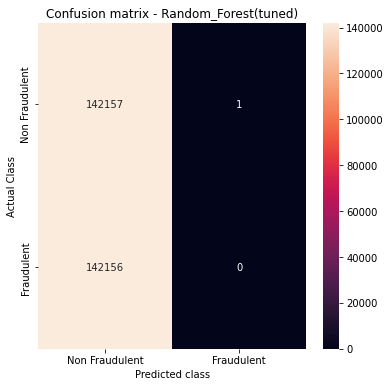

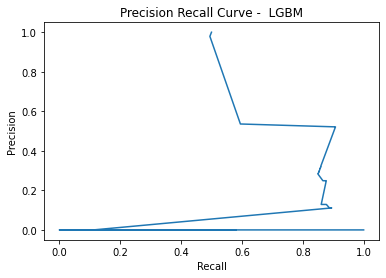

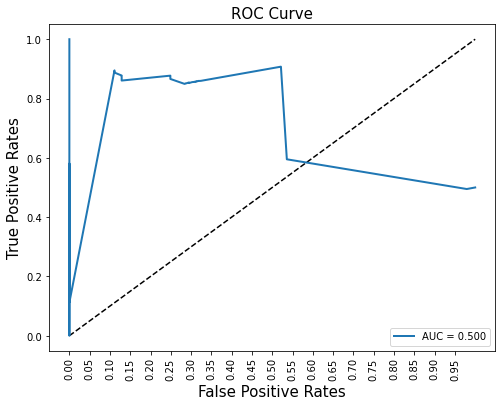

In [ ]:
print("Random_FOrest (Tuned)")
print("======================")
print("Accuracy: ",accuracy_score(y_test,rf_tuned_pred)) 
print("Precision: ",precision_score(y_test,rf_tuned_pred))
print("Recall: ",recall_score(y_test,rf_tuned_pred))
print("F1-Score: ",f1_score(y_test,rf_tuned_pred))
print("AUC score: ",roc_auc_score(y_test,rf_tuned_pred))
print(classification_report(y_test,rf_tuned_pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))

confusionMatrix = confusion_matrix(y_test,rf_tuned_pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random_Forest(tuned)") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
print("\n")
plt.show()
print("\n")

p, r, t = precision_recall_curve(y_test,rf_tuned_pred_proba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve -  LGBM')

print("\n")

plot_roc_curve(fpr=r, tpr=p, label="AUC = %.3f" % roc_auc_score(y_test,rf_tuned_pred))

# KNN

In [ ]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))